# Env. Setup

In [3]:
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import pandas as pd
import random
from pathlib import Path

# Data prep

## Filter samples

In [6]:
root_dir = Path("/content/drive/My Drive/Colab Notebooks/trabalho_final/dataset/")
train_labels = root_dir.joinpath("labels/train.csv")

train = pd.read_csv(train_labels)

In [7]:
train_filtered = train[pd.notnull(train['density']) & pd.notnull(train['age']) & pd.notnull(train['implant'])]

In [8]:
len(train_filtered)

23650

In [9]:
train_filtered

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
12,1,10038,1967300488,L,MLO,60.0,0,0,0,1.0,0,C,216,False
13,1,10038,2142944869,L,CC,60.0,0,0,0,1.0,0,C,216,False
14,1,10038,850559196,R,MLO,60.0,0,0,0,1.0,0,C,216,False
15,1,10038,1350492010,R,CC,60.0,0,0,0,1.0,0,C,216,False
16,1,10042,102733848,L,CC,51.0,0,0,0,1.0,0,C,93,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43739,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False
43740,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False
43741,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False
43742,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True


## Convert categorical columns to onehot encoding

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def to_onehot(df, column):
  orig = df[column].to_numpy()
  orig = orig.reshape(len(orig), 1)
  onehot_enc = OneHotEncoder(sparse_output=False, drop="if_binary").fit(orig)
  col_names = onehot_enc.get_feature_names_out([column])
  df.loc[:, col_names] = onehot_enc.transform(orig)

  return onehot_enc

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

encoders = {
    "laterality": to_onehot(train_filtered, "laterality"),
    "view": to_onehot(train_filtered, "view"),
    "density": to_onehot(train_filtered, "density")
}


<ipython-input-10-238158a30ea1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col_names] = onehot_enc.transform(orig)
<ipython-input-10-238158a30ea1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col_names] = onehot_enc.transform(orig)
<ipython-input-10-238158a30ea1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [12]:
train_filtered

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,...,view_AT,view_CC,view_LM,view_LMO,view_ML,view_MLO,density_A,density_B,density_C,density_D
12,1,10038,1967300488,L,MLO,60.0,0,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13,1,10038,2142944869,L,CC,60.0,0,0,0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14,1,10038,850559196,R,MLO,60.0,0,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
15,1,10038,1350492010,R,CC,60.0,0,0,0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16,1,10042,102733848,L,CC,51.0,0,0,0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43739,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
43740,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
43741,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
43742,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Generate img path column

In [13]:
import os

train_filtered.loc[:, ["imgpath"]] = (str(root_dir.joinpath("images")) +
                                      "/" + train_filtered["patient_id"].astype(str) +
                                      "/" + train_filtered["image_id"].astype(str) + ".png")

<ipython-input-13-0cef1f150f65>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered.loc[:, ["imgpath"]] = (str(root_dir.joinpath("images")) +


## Separate train and validation sets & Norm Age column

In [14]:
from sklearn.model_selection import train_test_split

patients = np.unique(train_filtered["patient_id"].to_numpy())
trainset, valset = train_test_split(patients, test_size=0.25, random_state=42)


In [15]:
trainset_df = train_filtered.loc[train_filtered['patient_id'].isin(trainset)]
valset_df = train_filtered.loc[train_filtered['patient_id'].isin(valset)]

In [16]:
valset_df

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,...,view_CC,view_LM,view_LMO,view_ML,view_MLO,density_A,density_B,density_C,density_D,imgpath
110,1,10175,782975270,L,CC,61.0,0,0,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,/content/drive/My Drive/Colab Notebooks/trabal...
111,1,10175,1352374842,L,MLO,61.0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,/content/drive/My Drive/Colab Notebooks/trabal...
112,1,10175,194880525,R,CC,61.0,0,0,0,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,/content/drive/My Drive/Colab Notebooks/trabal...
113,1,10175,611694376,R,MLO,61.0,0,0,0,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,/content/drive/My Drive/Colab Notebooks/trabal...
213,1,10289,906075357,L,MLO,62.0,0,0,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,/content/drive/My Drive/Colab Notebooks/trabal...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43735,1,997,1775983513,R,MLO,42.0,0,0,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,/content/drive/My Drive/Colab Notebooks/trabal...
43736,1,9973,1345265157,L,CC,43.0,0,0,0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,/content/drive/My Drive/Colab Notebooks/trabal...
43737,1,9973,1703611570,L,MLO,43.0,0,0,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,/content/drive/My Drive/Colab Notebooks/trabal...
43738,1,9973,655941939,R,CC,43.0,0,0,0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,/content/drive/My Drive/Colab Notebooks/trabal...


In [17]:
def get_patient_ages(df):
  patient_ids = df["patient_id"].unique()
  ages = [ df.loc[df["patient_id"] == id, "age"].unique()[0] for id in patient_ids ]
  return np.array(ages)

In [18]:
from sklearn.preprocessing import StandardScaler

age_per_patient = get_patient_ages(trainset_df)
age_per_patient = age_per_patient.reshape(len(age_per_patient), 1)
age_scaler = StandardScaler()
age_scaler.fit(age_per_patient)

trainset_df["age"] =  age_scaler.transform(trainset_df["age"].values.reshape(-1, 1))
valset_df["age"] =  age_scaler.transform(valset_df["age"].values.reshape(-1, 1))


<ipython-input-18-051db849a056>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset_df["age"] =  age_scaler.transform(trainset_df["age"].values.reshape(-1, 1))
<ipython-input-18-051db849a056>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valset_df["age"] =  age_scaler.transform(valset_df["age"].values.reshape(-1, 1))


In [19]:
valset_df

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,...,view_CC,view_LM,view_LMO,view_ML,view_MLO,density_A,density_B,density_C,density_D,imgpath
110,1,10175,782975270,L,CC,0.321063,0,0,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,/content/drive/My Drive/Colab Notebooks/trabal...
111,1,10175,1352374842,L,MLO,0.321063,0,0,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,/content/drive/My Drive/Colab Notebooks/trabal...
112,1,10175,194880525,R,CC,0.321063,0,0,0,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,/content/drive/My Drive/Colab Notebooks/trabal...
113,1,10175,611694376,R,MLO,0.321063,0,0,0,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,/content/drive/My Drive/Colab Notebooks/trabal...
213,1,10289,906075357,L,MLO,0.409584,0,0,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,/content/drive/My Drive/Colab Notebooks/trabal...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43735,1,997,1775983513,R,MLO,-1.360838,0,0,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,/content/drive/My Drive/Colab Notebooks/trabal...
43736,1,9973,1345265157,L,CC,-1.272317,0,0,0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,/content/drive/My Drive/Colab Notebooks/trabal...
43737,1,9973,1703611570,L,MLO,-1.272317,0,0,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,/content/drive/My Drive/Colab Notebooks/trabal...
43738,1,9973,655941939,R,CC,-1.272317,0,0,0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,/content/drive/My Drive/Colab Notebooks/trabal...


## Generate tf datasets

In [20]:
from tensorflow.data import AUTOTUNE
import tensorflow as tf
import sys

BATCH_SIZE = 4
INPUT_SIZE = (1024, 512)
INPUT_SIZE_FULL = (1024, 512, 3)

COLS = ["age", "implant"]

test_pipeline = False
if test_pipeline:
  dataset_train = tf.data.Dataset.from_tensor_slices(dict(trainset_df.head(20)))
  dataset_val = tf.data.Dataset.from_tensor_slices(dict(valset_df.head(5)))
  EPOCH = 2
else:
  EPOCH = 5
  dataset_train = tf.data.Dataset.from_tensor_slices(dict(trainset_df))
  dataset_val = tf.data.Dataset.from_tensor_slices(dict(valset_df))


In [21]:
for row in dataset_train.take(3):
  print(row)


{'site_id': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'patient_id': <tf.Tensor: shape=(), dtype=int64, numpy=10038>, 'image_id': <tf.Tensor: shape=(), dtype=int64, numpy=1967300488>, 'laterality': <tf.Tensor: shape=(), dtype=string, numpy=b'L'>, 'view': <tf.Tensor: shape=(), dtype=string, numpy=b'MLO'>, 'age': <tf.Tensor: shape=(), dtype=float64, numpy=0.23254174611438055>, 'cancer': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'biopsy': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'invasive': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'BIRADS': <tf.Tensor: shape=(), dtype=float64, numpy=1.0>, 'implant': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'density': <tf.Tensor: shape=(), dtype=string, numpy=b'C'>, 'machine_id': <tf.Tensor: shape=(), dtype=int64, numpy=216>, 'difficult_negative_case': <tf.Tensor: shape=(), dtype=bool, numpy=False>, 'laterality_R': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'view_AT': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'view_CC': <tf.Te

In [22]:
def load_images(data_dict):
  image_path = data_dict["imgpath"]
  age = data_dict["age"]
  implant = data_dict["implant"]
  cancer = data_dict["cancer"]

  image = tf.io.read_file(image_path)
  image = tf.image.decode_png(image, channels=3)
  image = tf.image.resize(image, INPUT_SIZE) * (1./255.)

  attr = tf.convert_to_tensor([age, tf.cast(implant, tf.float64)])

  return ({"attr": attr, "img":image}, cancer)

In [23]:
dataset_train = (dataset_train
	.shuffle(128)
	.map(load_images, num_parallel_calls=2)
	.batch(BATCH_SIZE)
	.prefetch(AUTOTUNE)
)

dataset_val = (dataset_val
	.shuffle(128)
	.map(load_images, num_parallel_calls=2)
	.batch(BATCH_SIZE)
	.prefetch(AUTOTUNE)
)

# Create Model

In [24]:
from tensorflow.keras import layers

def create_img_model(width, height, depth, regress=False):
  inp = layers.Input(shape=(width,height,depth), name="img")
  base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_tensor=inp,
                                            input_shape=(width,height,depth))

  for layer in base_model.layers:
      layer.trainable = True

  conv5_block3_out = base_model.get_layer('conv5_block3_out')
  pooling = tf.keras.layers.GlobalAveragePooling2D()(conv5_block3_out.output)
  dense_out = tf.keras.layers.Dense(4, activation='relu')(pooling)

  model = tf.keras.models.Model(inputs = inp, outputs = dense_out)

  return model

In [25]:
from tensorflow.keras.models import Sequential

def create_mlp(dim, regress=False):
  # define our MLP network
  model = Sequential()
  model.add(tf.keras.layers.Input(dim, name="attr"))
  model.add(tf.keras.layers.Dense(8, input_dim=dim, activation="relu"))
  model.add(tf.keras.layers.Dense(4, activation="relu"))

  return model

In [26]:
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model

def create_model(input_mlp, input_img):
  mlp = create_mlp(input_mlp)
  imgnet = create_img_model(input_img[0], input_img[1], input_img[2])

  combinedInput = concatenate([mlp.output, imgnet.output])

  x = tf.keras.layers.Dense(4, activation="relu")(combinedInput)
  x = tf.keras.layers.Dense(1, activation="softmax")(x)

  model = Model(inputs=[mlp.input, imgnet.input], outputs=x)
  return model


# Train Model



## Create training weights

In [27]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
           class_weight='balanced',
           classes=trainset_df["cancer"].unique(),
           y=trainset_df["cancer"].to_numpy())
class_weights = dict(enumerate(class_weights))

In [28]:
class_weights

{0: 0.5119907541173071, 1: 21.349397590361445}

## Train model

In [29]:
from tensorflow.keras.optimizers import SGD

model = create_model(len(COLS), INPUT_SIZE_FULL)
opt = SGD(learning_rate=0.00001, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])


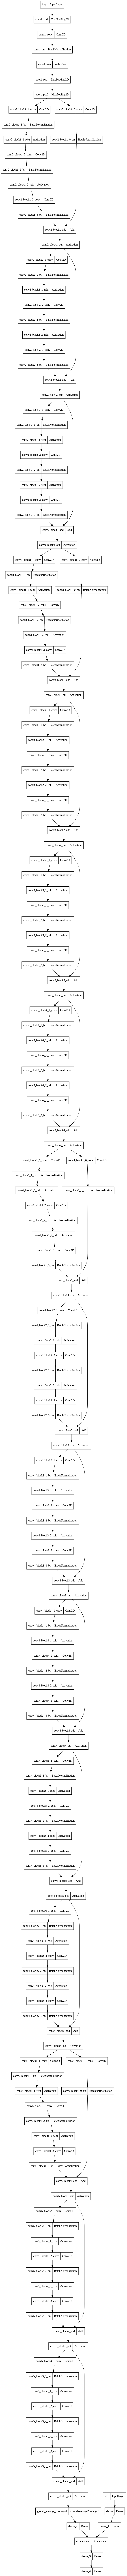

In [30]:
tf.keras.utils.plot_model(model)

In [ ]:
from keras import callbacks

device = '/gpu:0'
with tf.device(device):
    model.fit(dataset_train,
              epochs=EPOCH,
              verbose=1,
              callbacks=[
                  callbacks.TerminateOnNaN(),
                  callbacks.ModelCheckpoint('weights.h5',
                                            save_best_only=True,
                                            verbose=1),],
              validation_data=dataset_val)

Epoch 1/5
1486/4430 [=========>....................] - ETA: 1:02:24 - loss: 0.2179 - accuracy: 0.0259